In [40]:
import numpy as np
from math import pi, cos, sin, sqrt
from PIL import Image, ImageOps
from objectreader import ObjModel

folder = f'img/'

In [41]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)

In [42]:
def dotted_line(image, x0, y0, x1, y1, count, color):
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

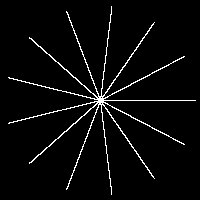

In [43]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, 100 + 95 * cos(alpha), 100 + 95 * sin(alpha), 1000, (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_1.jpg')
img

In [44]:
def dotted_line(image, x0, y0, x1, y1, color):
    count = sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

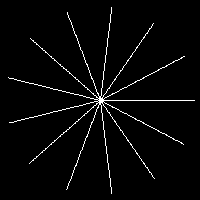

In [45]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, 100 + 95 * cos(alpha), 100 + 95 * sin(alpha), (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_2.jpg')
img

In [46]:
def dotted_line2(image, x0, y0, x1, y1, color):
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

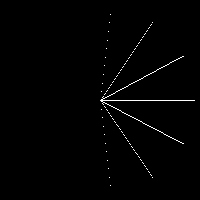

In [47]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line2(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_3.jpg')
img

In [48]:
def dotted_line(image, x0, y0, x1, y1, color):
    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

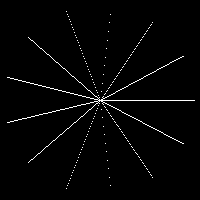

In [49]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_4.jpg')
img

In [50]:
def dotted_line(image, x0, y0, x1, y1, color):
    xchange = False
    if abs(x0 - x1) < abs(y0 - y1):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        if xchange:
            image[x, y] = color
        else:
            image[y, x] = color

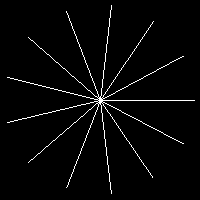

In [51]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_5.jpg')
img

In [52]:
def dotted_line(image, x0, y0, x1, y1, color):
    xchange = False
    if abs(x0 - x1) < abs(y0 - y1):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    y = y0
    dy = 2.0 * abs(y1 - y0)
    derror = 0.0
    y_update = 1 if y1 > y0 else -1

    for x in range(x0, x1):
        if xchange:
            image[x, y] = color
        else:
            image[y, x] = color

        derror += dy
        if derror > (x1 - x0):
            derror -= 2 * (x1 - x0)
            y += y_update

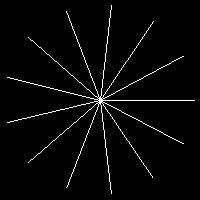

In [53]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save(folder + '1_6.jpg')
img

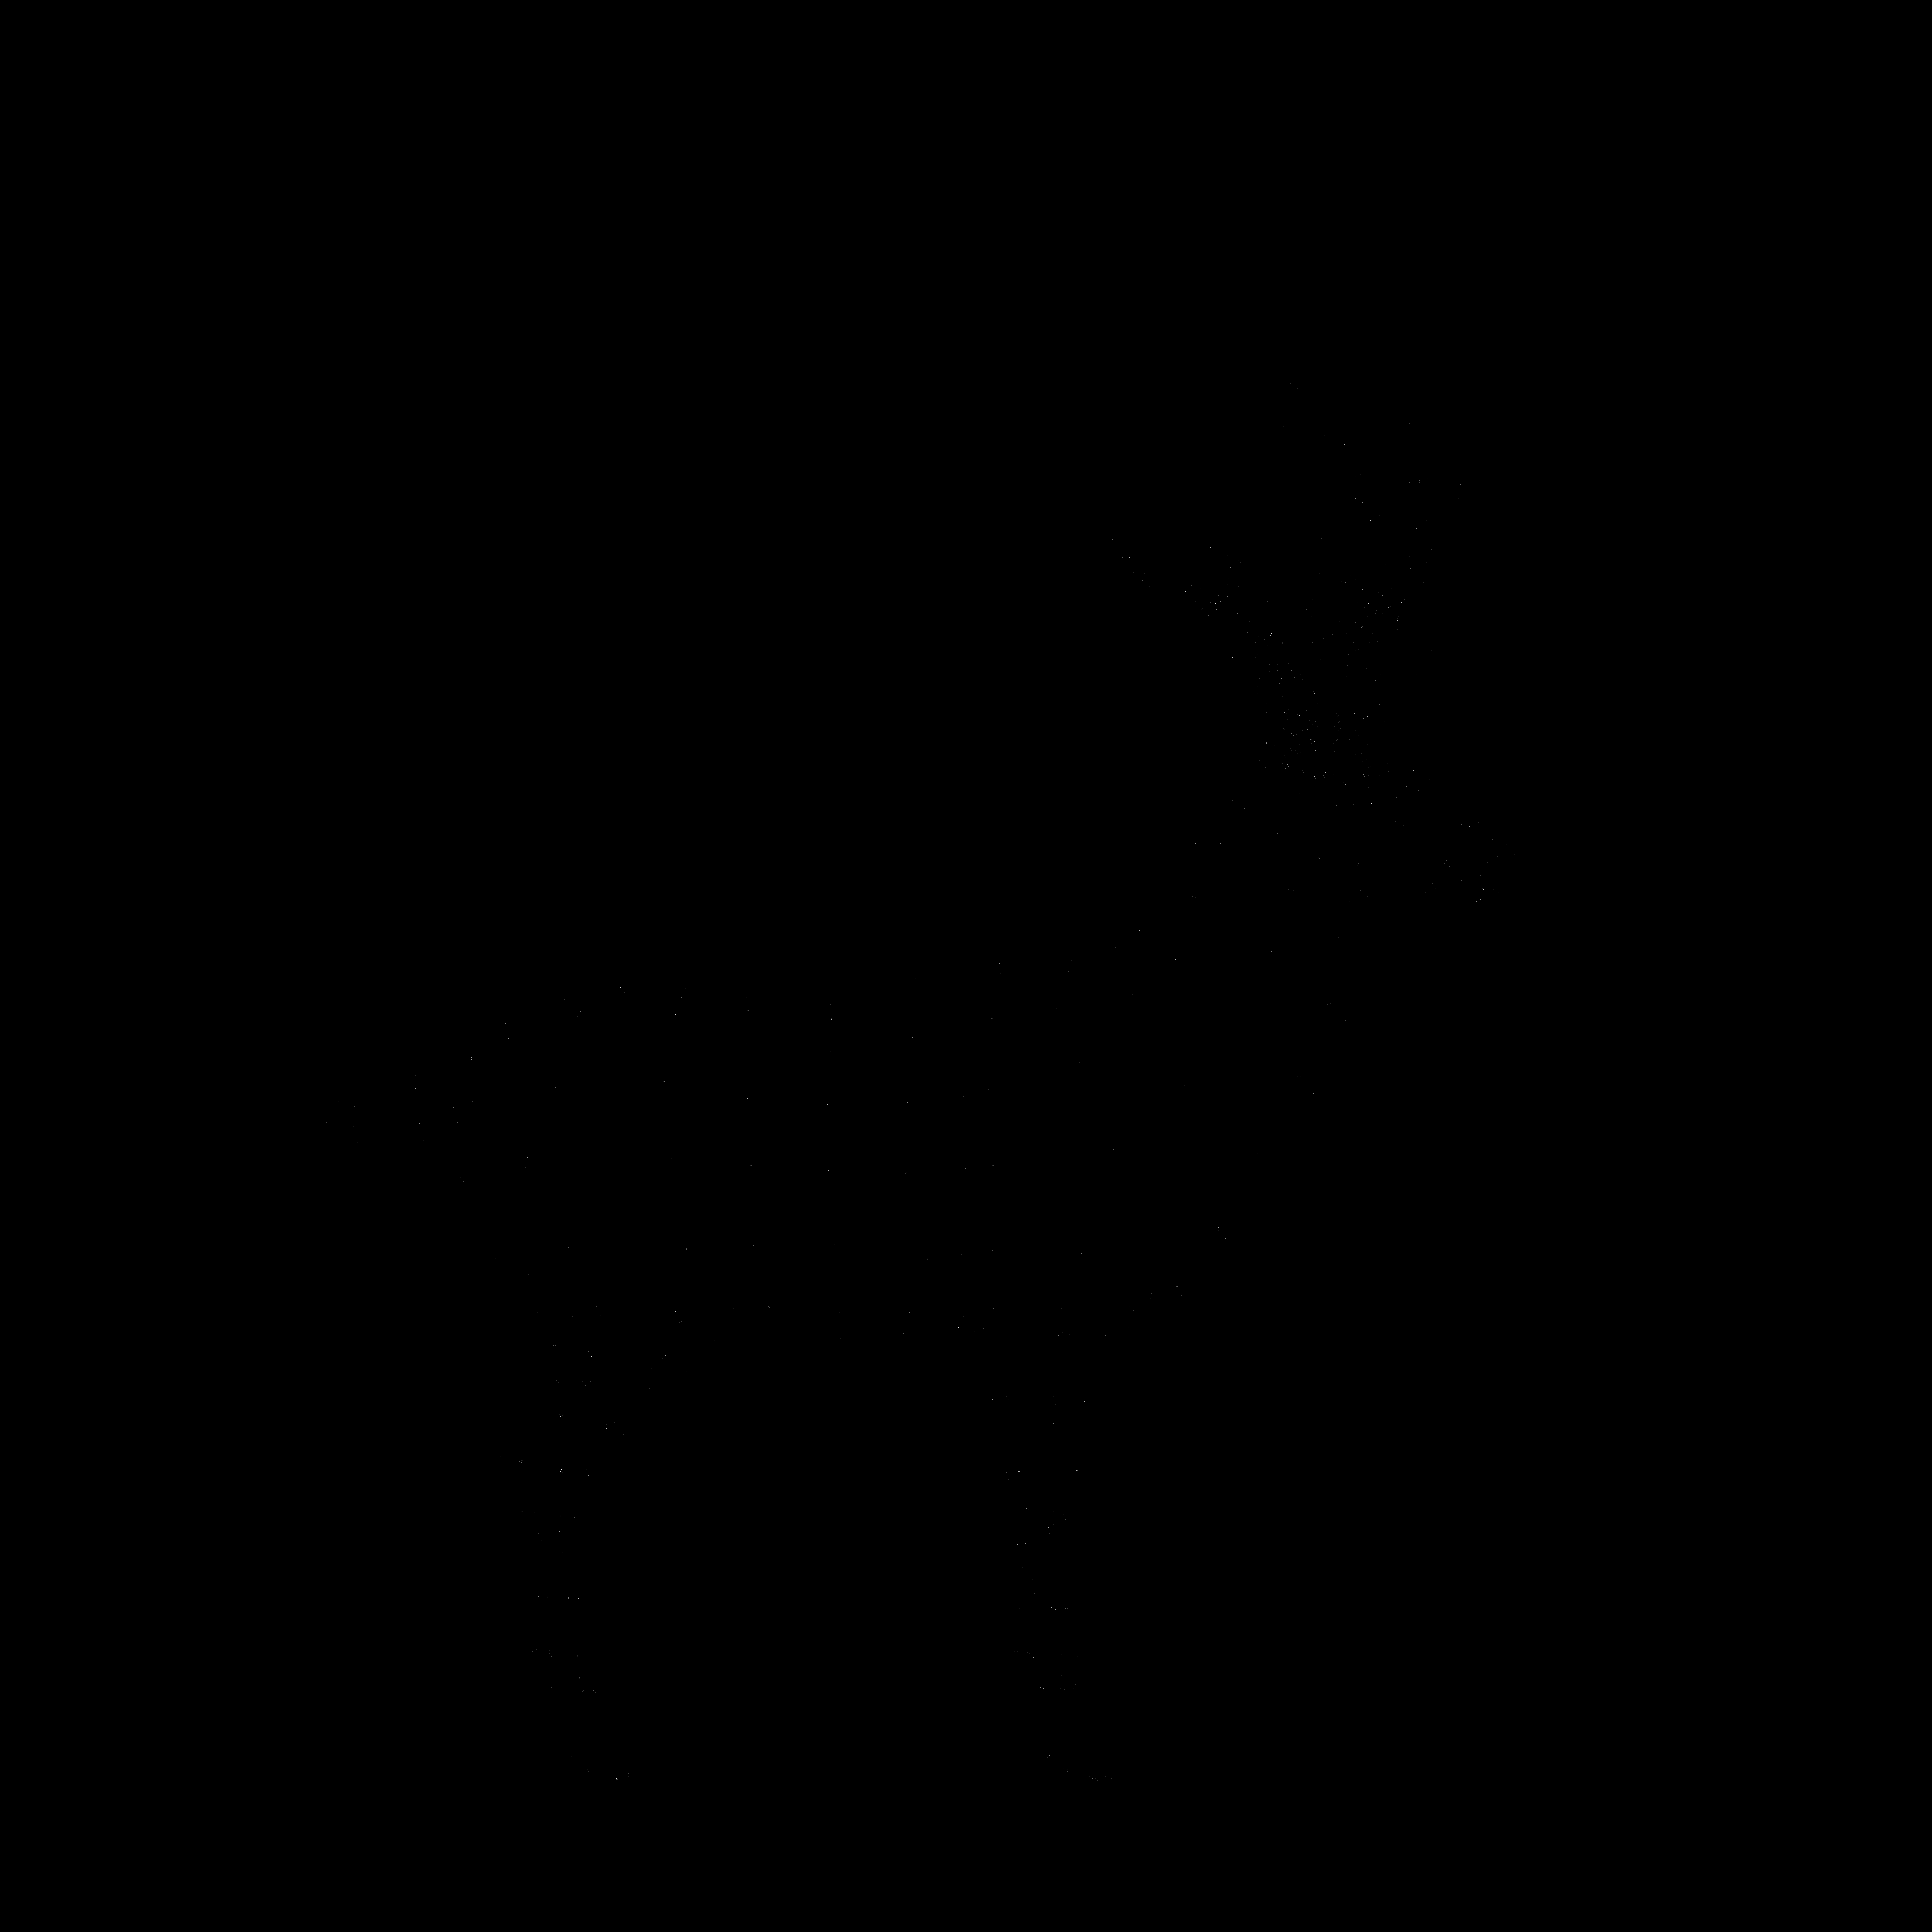

In [57]:
ar = np.full((4000, 4000), fill_value=0, dtype=np.uint8)

obj = ObjModel()
obj.readModel('model/model_2.obj')

k = 2
x0 = 2000
y0 = 300
for pol in obj.vertex:
    ar[(int(pol[1] * k) + y0)][int(pol[0] * k) + x0] = 255

img = ImageOps.flip(Image.fromarray(ar, mode="L"))
img.save(folder + "a_8.jpg")
img

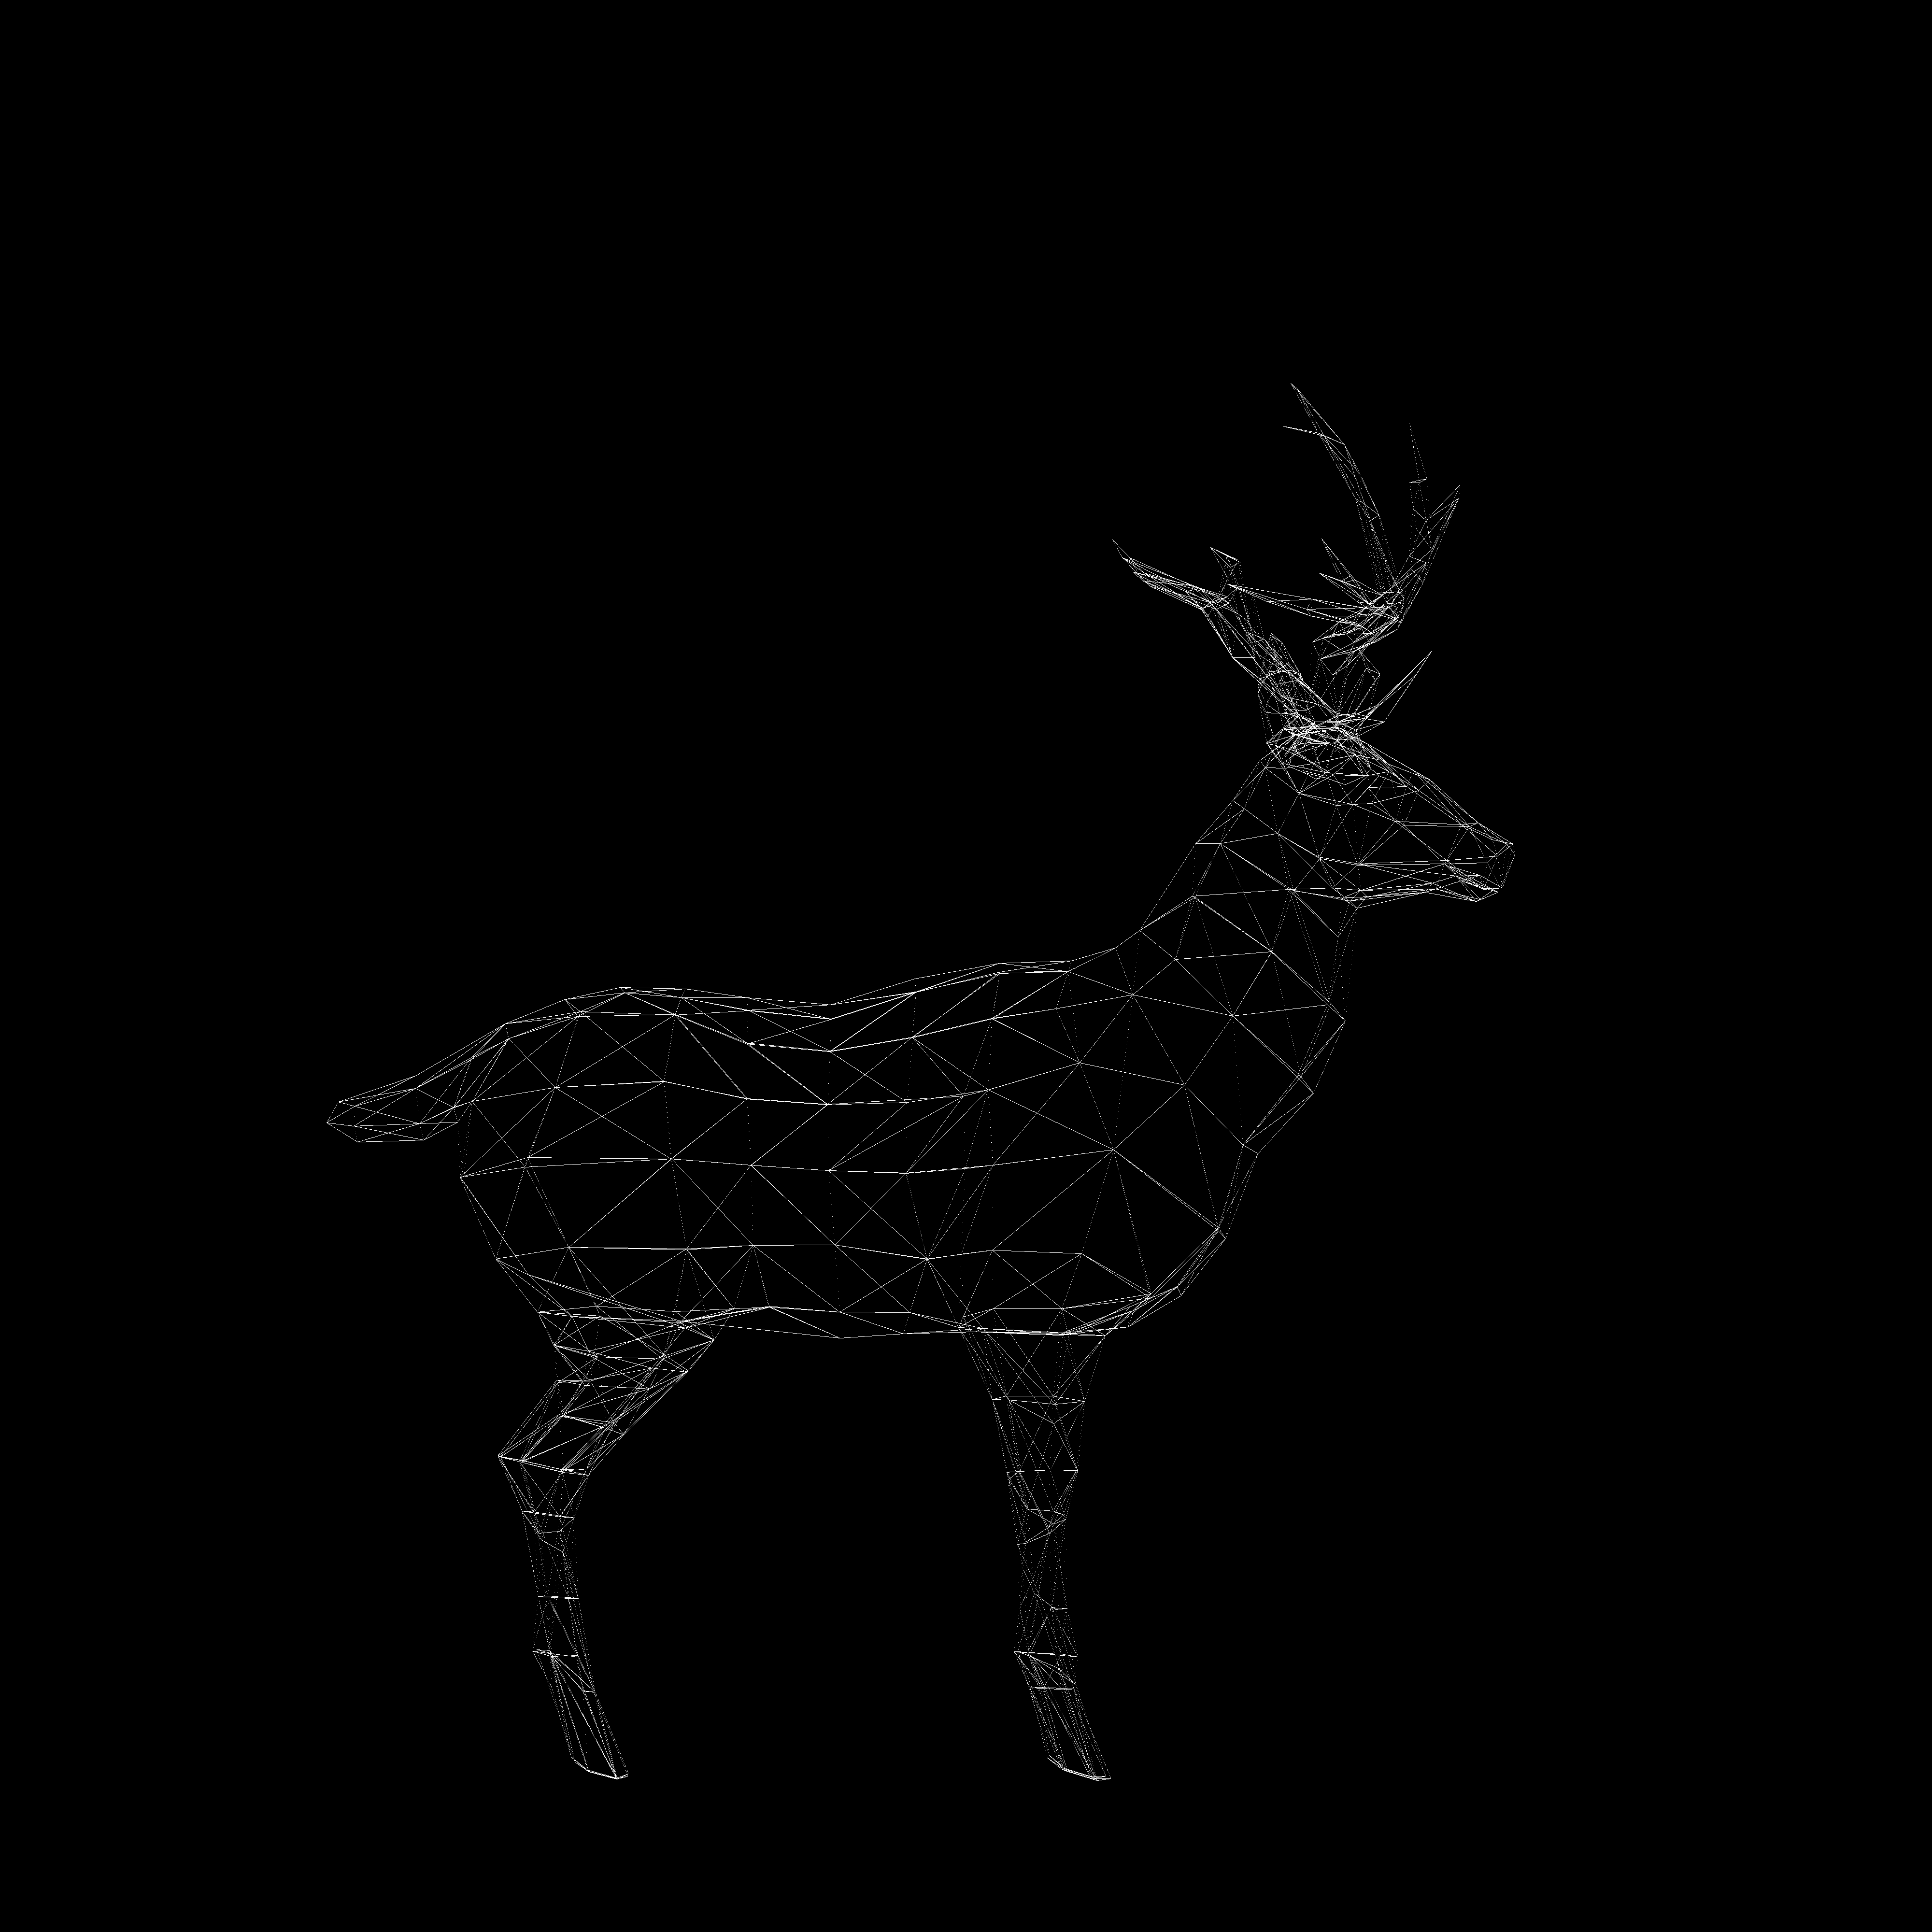

In [58]:
ar = np.full((4000, 4000), fill_value=0, dtype=np.uint8)

obj = ObjModel()
obj.readModel('model/model_2.obj')

k = 2
x0 = 2000
y0 = 300

for pol in obj.polygons:
    for i in range(3):
        vertexs = obj.getVertexFromPolygon(pol)
        dotted_line2(ar, int(vertexs[i % 3][0] * k) + x0, int(vertexs[i % 3][1] * k) + y0,
                     int(vertexs[(i + 1) % 3][0] * k) + x0, int(vertexs[(i + 1) % 3][1] * k) + y0, 255)

img = ImageOps.flip(Image.fromarray(ar, mode="L"))
img.save(folder + "a_9.jpg")
img